In [6]:
import random
import numpy as np

traning_samples = {(random.randint(1, 100), random.randint(1, 100)): random.randint(1, 100) for _ in range(20)}
testing_samples = {(random.randint(1, 100), random.randint(1, 100)): random.randint(1, 100) for _ in range(20)}

training_set = [dict(list(traning_samples.items())[i: i+10]) for i in range(0, len(traning_samples.items()), 10)]

network_inputs = [np.array(list(batch.keys())) for batch in training_set]
network_truths = [np.array(list(batch.values())).reshape(10,1) for batch in training_set]

testing_inputs = np.array(list(testing_samples.keys()))
testing_truths = np.array(list(testing_samples.values())).reshape(20,1)

print(f'preshuffle network inputs: {network_inputs}')
print(f'presshuffle network truths: {network_truths}')

indices = random.shuffle(list(range(len(network_inputs))))
network_inputs = [network_inputs[i] for i in indices]
network_truths = [network_truths[i] for i in indices]

print(f'network inputs: {network_inputs}')
print(f'network truths: {network_truths}')

print(f'testinginputs: {testing_inputs}')
print(f'testing truths: {testing_truths}')

print(isinstance(testing_inputs, np.ndarray))  # Should print True
print(isinstance(testing_truths, np.ndarray))  # Should print True

preshuffle network inputs: [array([[18, 76],
       [87, 67],
       [71, 23],
       [56, 25],
       [35, 19],
       [36, 88],
       [74, 67],
       [20, 60],
       [24, 72],
       [60, 81]]), array([[30, 31],
       [22, 19],
       [28, 74],
       [38, 40],
       [64, 43],
       [38, 29],
       [89, 47],
       [52, 75],
       [85, 21],
       [92, 90]])]
presshuffle network truths: [array([[97],
       [35],
       [97],
       [30],
       [66],
       [54],
       [97],
       [19],
       [47],
       [76]]), array([[23],
       [41],
       [51],
       [27],
       [22],
       [36],
       [39],
       [18],
       [47],
       [97]])]


TypeError: 'NoneType' object is not iterable

# Regression Demo

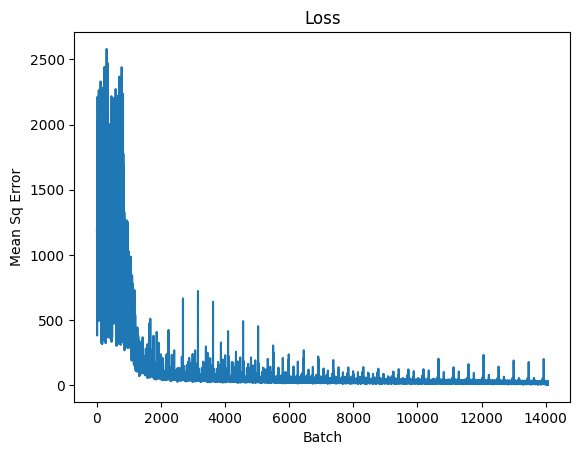

MSE: 1.1553647388279495



,Model Predictions,Truths
0,9.839186,9.051402
1,-4.498247,-6.413754
2,31.389873,33.096557
3,12.041810,10.937521
4,10.845085,9.976577
5,1.774061,2.062270
6,51.077821,49.840651
7,14.271218,13.830569
8,18.697678,19.346478
9,-2.652160,-2.266695


In [1]:
import imports as im
import random
import numpy as np

training_samples = {}
for i in range(30000):
    x = random.uniform(-5,5)
    y = random.uniform(-5,5)
    z = random.uniform(-5,5)
    w = 2*x + 3*y + np.exp(z)
    training_samples[(x,y,z)] = w

testing_samples = {}
for i in range(10):
    x = random.uniform(-5,5)
    y = random.uniform(-5,5)
    z = random.uniform(-5,5)
    w = 2*x + 3*y + np.exp(z)
    testing_samples[(x,y,z)] = w

network = im.Network([im.Layer(3, 4, 'sigmoid'),
                      im.Layer(4, 8, 'relu'),
                      im.Layer(8, 6, 'relu'),
                      im.Layer(6, 3, 'relu'),
                      im.Layer(3, 1, "linear")], 
                      rate=0.0001,
                      regressor=True)

network.train_test(
                training_samples=training_samples, 
                testing_samples=testing_samples, 
                batch_size=64,
                n_epochs=30
                )